### KNN (K-Nearest Neighbors) Lab

In this lab we will attempt to classify, whether or not a wine is HIGH or LOW quality. This is a classification task since we will attempt to discrimnate between these two options.  To do so, we will take as input features of each wine and previous labels of HIGH or LOW quality.

In [26]:
import pandas as pd
import seaborn as sns
%matplotlib inline


# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


#### Classifying high quality wines
- In this dataset, `quality` is a numeric column, if we were performing regression, we could predict this value.
- Since we are performing classification, we will predict `high_quality` which is 1 or 0, a binary label.
- What is the baseline accuracy that we should attempt to beat?

- What is the baseline accuracy that we should attempt to beat?  

The baseline accuracy we are attempting to beat 75%?  Im guessing here
The answer is we want to pick better then the mean (a randomly selected dataset)


In [40]:
# the answer is 
df['high_quality'].describe()
# so we want to beat the mean...if we guess more then 19% then we are good shape

count    6497.000000
mean        0.196552
std         0.397421
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: high_quality, dtype: float64

#### What features are important to predict high quality wines?
- Let's explore the dataset

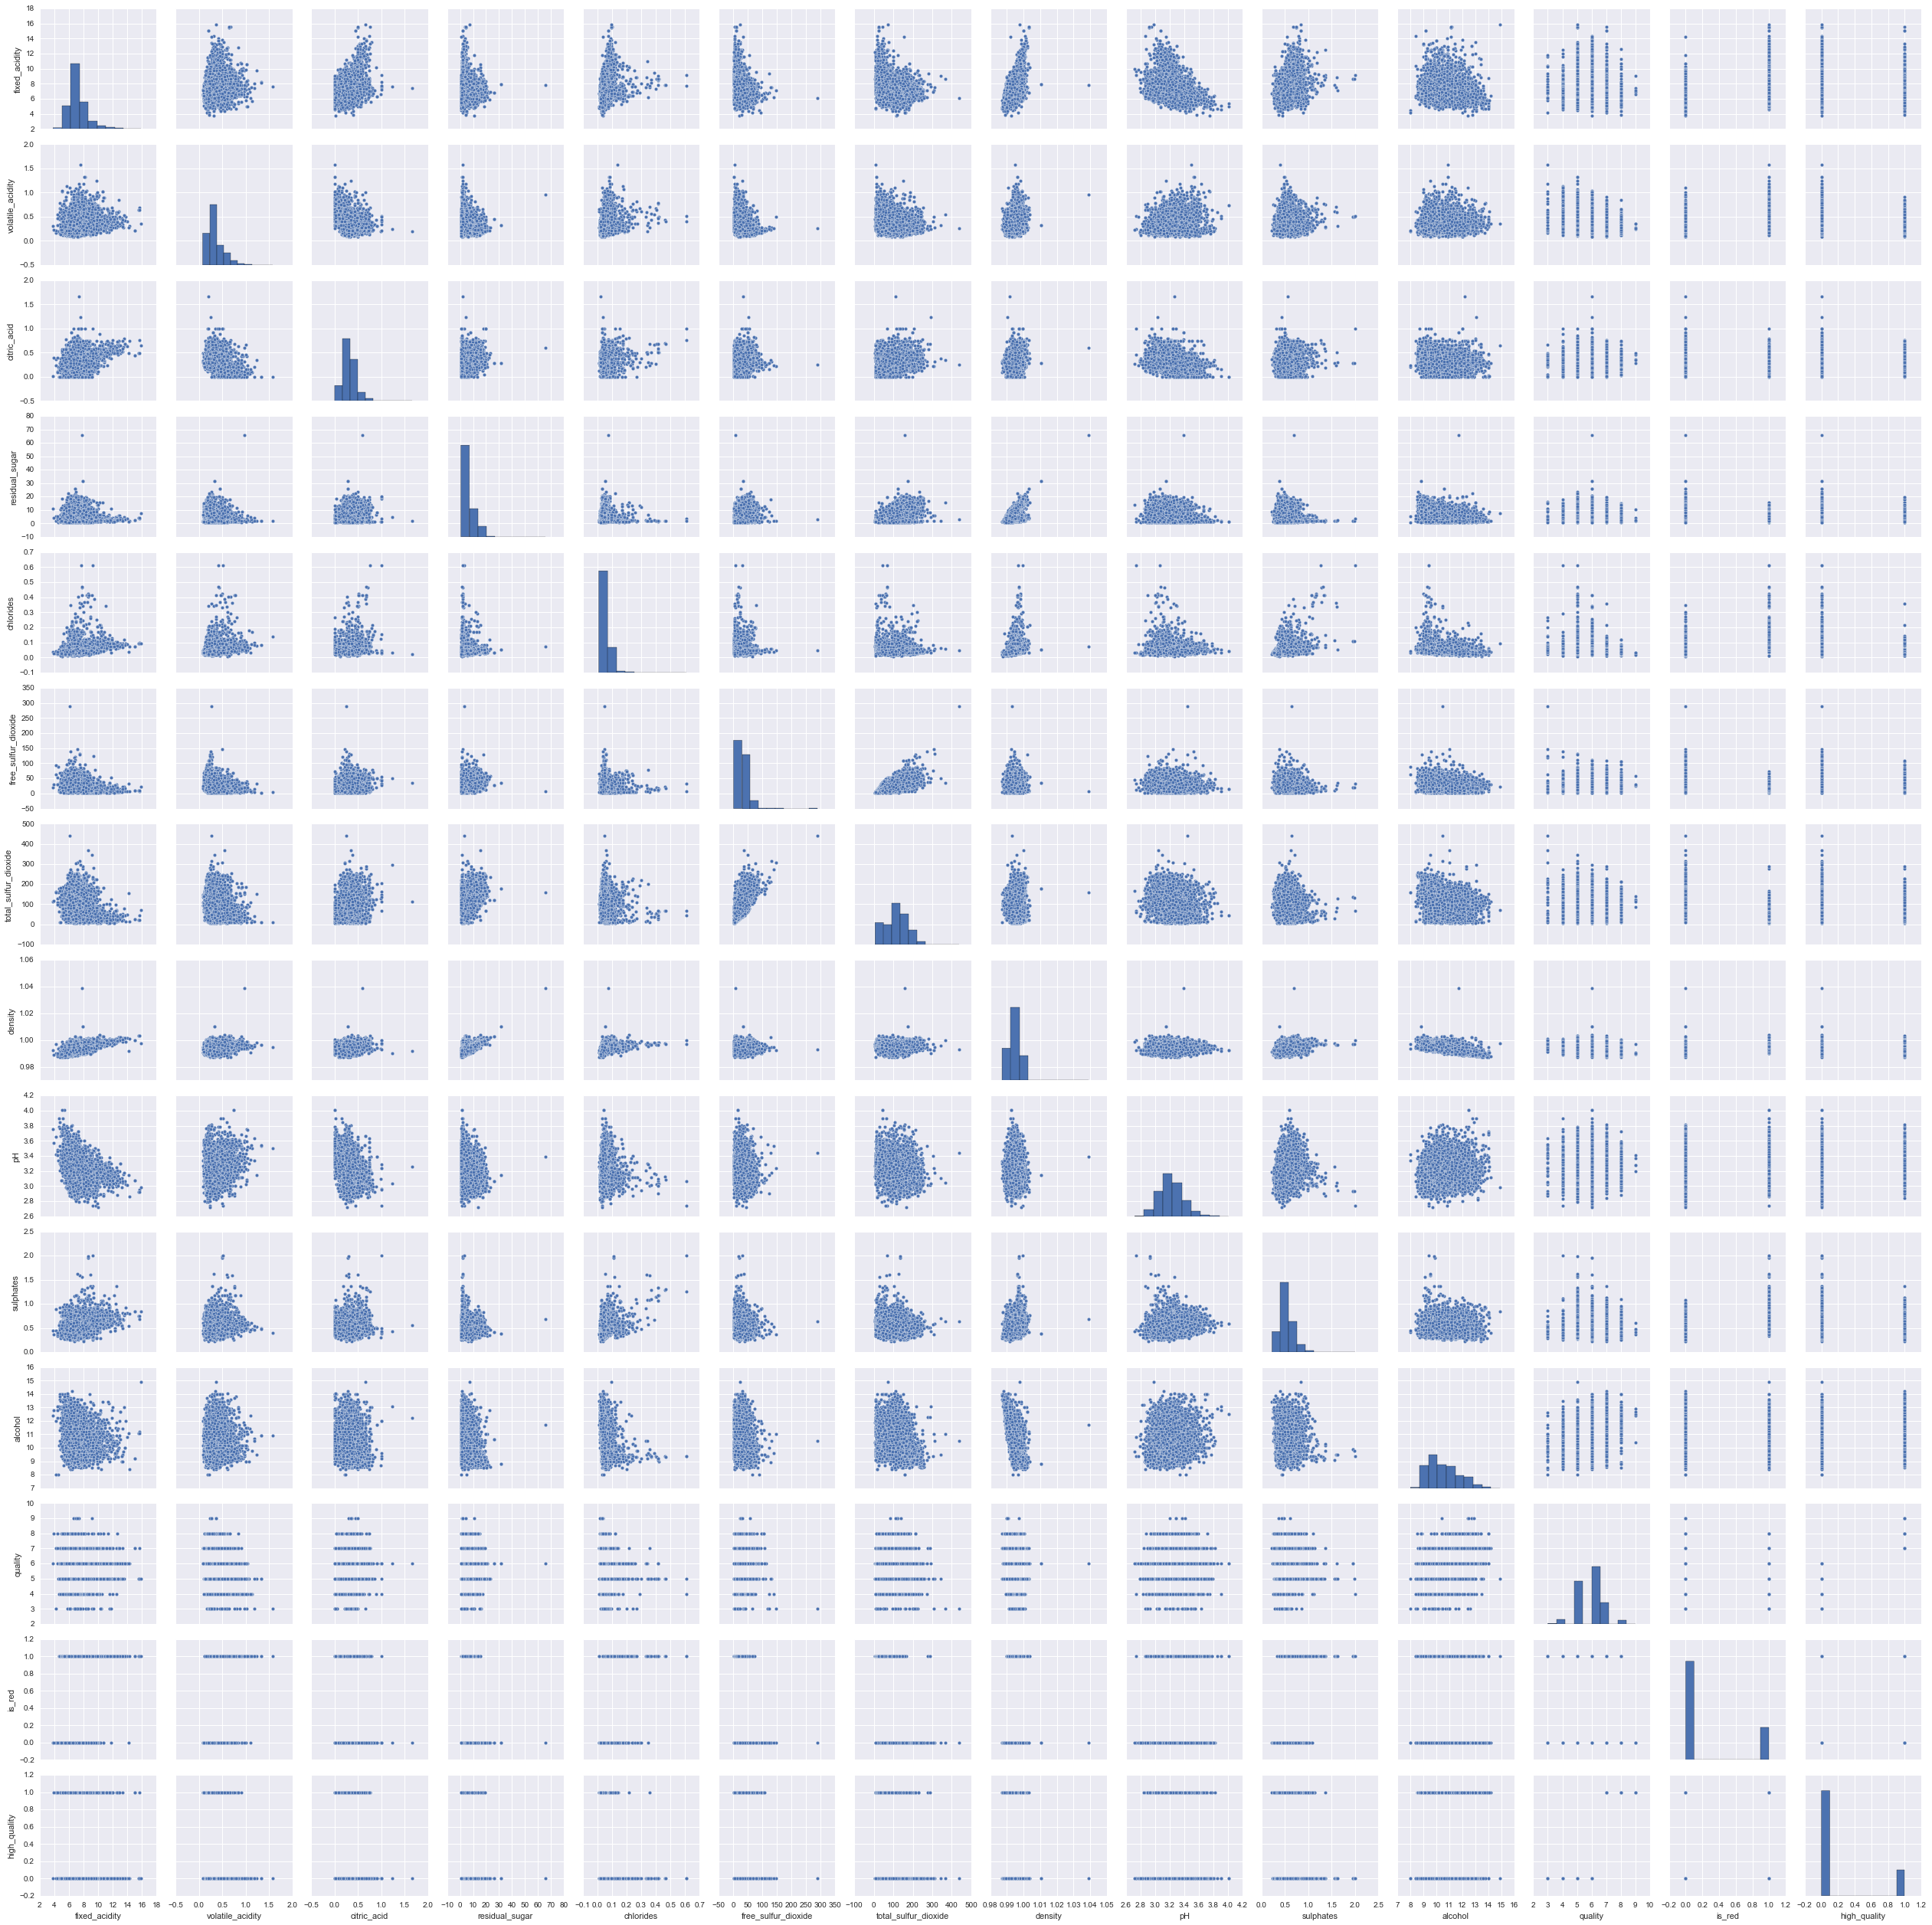

In [27]:
#i have no idea...i will run either a regression table to see what independent variables make the most sense.

df.head()
sns.pairplot(df)



In [28]:
df.corr().loc[:, 'high_quality']

fixed_acidity          -0.049447
volatile_acidity       -0.151714
citric_acid             0.054444
residual_sugar         -0.063992
chlorides              -0.161781
free_sulfur_dioxide     0.014767
total_sulfur_dioxide   -0.051226
density                -0.275441
pH                      0.028149
sulphates               0.033971
alcohol                 0.390486
quality                 0.759360
is_red                 -0.087479
high_quality            1.000000
Name: high_quality, dtype: float64

In [29]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.049447
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.151714
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.054444
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.161781
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.014767
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.033971


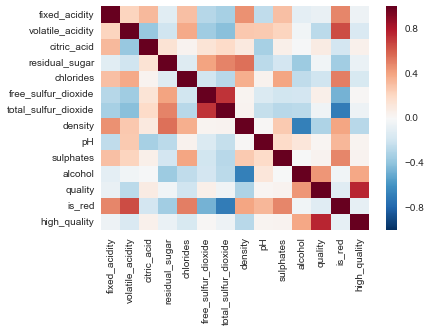

In [42]:
sns.heatmap(df.corr())

In [48]:
#Im going to narrow down my choices to the ones that have a higher coorelation to High Quality
#Chor = .16  Density = .27

good_features = df[['high_quality','volatile_acidity', 'chlorides', 'density', 'alcohol']].corr()

In [46]:
# now we need to scale this  so we need import it first
from sklearn.preprocessing import StandardScaler

In [62]:
SS =  StandardScaler()
SS.fit_transform(good_features)[0:5]

array([[ 1.75160533, -1.09891454, -0.94461217, -0.7106937 ,  0.5359857 ],
       [-0.65088608,  1.75465505,  0.25038562,  0.23751466, -0.20747876],
       [-0.67188736,  0.21137304,  1.63158282,  0.39588976, -0.5882619 ],
       [-0.90898238, -0.05083563,  0.21821123,  1.50131099, -1.33468449],
       [ 0.48015048, -0.81627793, -1.1555675 , -1.42402172,  1.59443945]])

In [81]:
y = df['high_quality'].reshape(-1,1)
x = df[['chlorides', 'density', 'alcohol']]

In [82]:
from sklearn.neighbors import KNeighborsClassifier


In [96]:
knn = KNeighborsClassifier(n_neighbors=6497)

In [97]:
knn.fit(x, y)

/Users/ugp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6497, p=2,
           weights='uniform')

In [98]:
# We were looking for a score with greater then 75%, I think we got 87%

knn.score(x, y)

0.80344774511312911

In [86]:
from sklearn.cross_validation import cross_val_score

In [ ]:
cross_val_score

#### Build K-Nearest Neighbors model to predict whether or not a wine is high quality
- Select features you think will be predictive of high quality wines
- Scale the dataset (remember, this is so that each variable contributes equally to the distance computation)
- Evaluate the accuracy of your model using cross-validation
- Evaluate different values of `n` to see how the number of neighbors affects the classification accuracy

In [6]:
# 'chlorides', 'density', 'alcohol'


In [7]:
# TODO